In [8]:
!pip install kaggle

In [15]:
import pandas as pd

galton_families = pd.read_csv('/content/sample_data/GaltonFamilies.csv')
print(galton_families.head())

   rownames family  father  mother  midparentHeight  children  childNum  \
0         1    001    78.5    67.0            75.43         4         1   
1         2    001    78.5    67.0            75.43         4         2   
2         3    001    78.5    67.0            75.43         4         3   
3         4    001    78.5    67.0            75.43         4         4   
4         5    002    75.5    66.5            73.66         4         1   

   gender  childHeight  
0    male         73.2  
1  female         69.2  
2  female         69.0  
3  female         69.0  
4    male         73.5  


In [16]:
import numpy as np

In [21]:
galton_families.head()

,rownames,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,001,78.5,67.0,75.43,4,1,male,73.2
1,2,001,78.5,67.0,75.43,4,2,female,69.2
2,3,001,78.5,67.0,75.43,4,3,female,69.0
3,4,001,78.5,67.0,75.43,4,4,female,69.0
4,5,002,75.5,66.5,73.66,4,1,male,73.5


In [22]:
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(galton_families.father))
galton_families_father_train = galton_families.father[indices[:-10]]
galton_families_mother_train = galton_families.mother[indices[:-10]]
galton_families_child_train = galton_families.childHeight[indices[:-10]]
galton_families_father_test = galton_families.father[indices[:-10]]
galton_families_mother_test = galton_families.mother[indices[:-10]]
galton_families_child_test = galton_families.childHeight[indices[:-10]]

In [23]:
from sklearn.neighbors import KNeighborsClassifier

   rownames family  father  mother  midparentHeight  children  childNum  \
0         1    001    78.5    67.0            75.43         4         1   
1         2    001    78.5    67.0            75.43         4         2   
2         3    001    78.5    67.0            75.43         4         3   
3         4    001    78.5    67.0            75.43         4         4   
4         5    002    75.5    66.5            73.66         4         1   

   gender  childHeight  
0    male         73.2  
1  female         69.2  
2  female         69.0  
3  female         69.0  
4    male         73.5  
(653, 2)
(281, 2)
Mean Squared Error: 13.253514051090606
R^2 Score: -0.09891189724346083


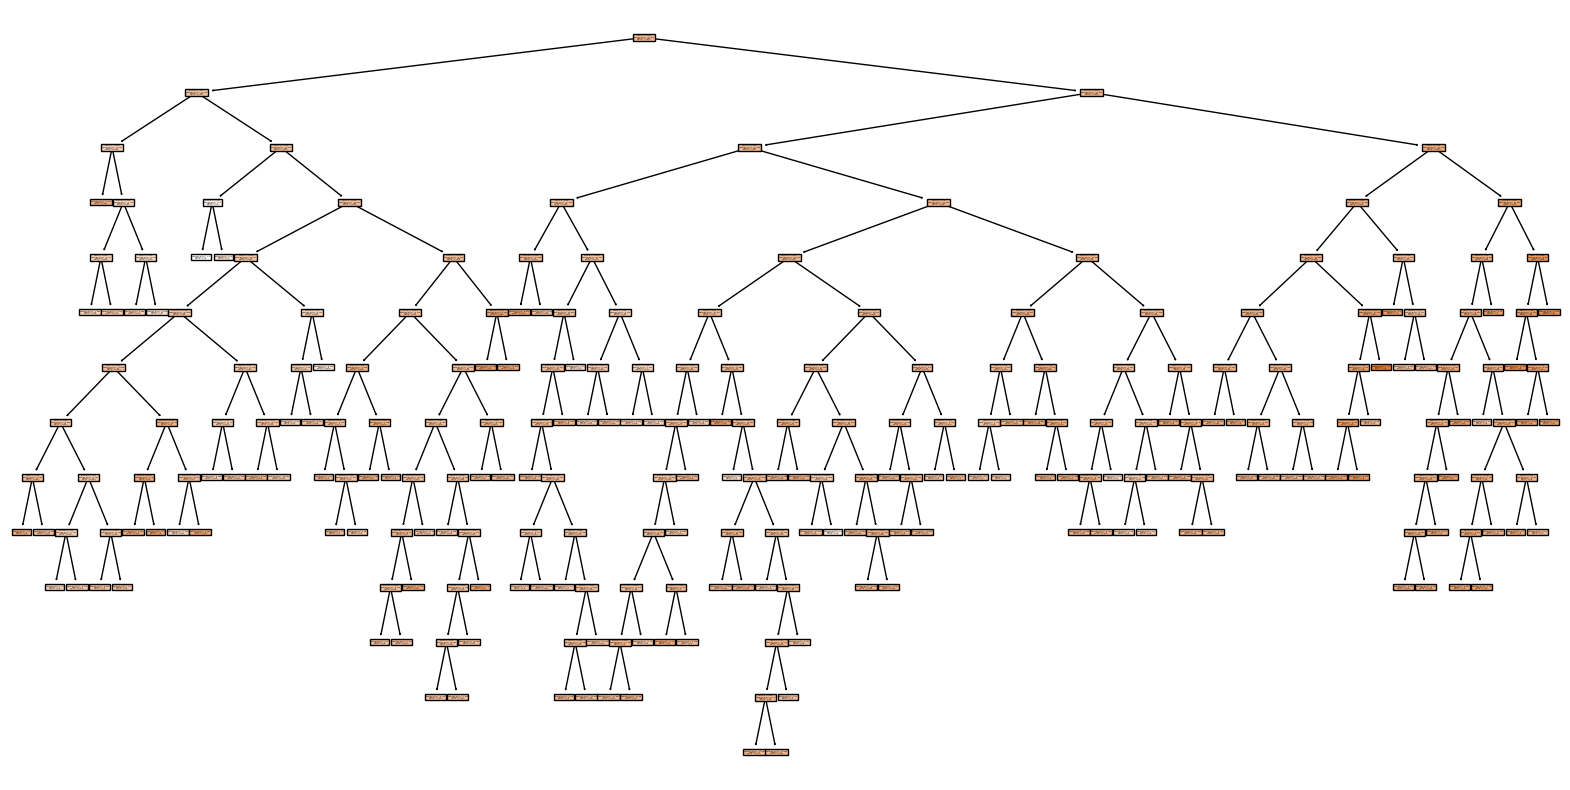

   Real   Previsto
0  68.5  65.500000
1  71.0  66.814286
2  70.0  66.600000
3  70.2  66.375000
4  69.0  67.733333
5  63.0  67.000000
6  71.0  67.200000
7  70.5  64.642857
8  66.5  67.520000
9  68.5  67.416667


In [38]:
# -*- coding: utf-8 -*-
"""Exemplo_arvore_decisao_GaltonFamilies.ipynb"""

# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregar os dados do dataset Galton Families
galton_families = pd.read_csv('/content/sample_data/GaltonFamilies.csv')

# Exibir as primeiras linhas do dataset
print(galton_families.head())

# Separar os dados em variáveis de entrada (X) e saída (y)
X = galton_families[['father', 'mother']].values
y = galton_families['childHeight'].values

# Dividir os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

# Exibir as formas dos conjuntos de treinamento e teste
print(X_treino.shape)  # (N, 2)
print(X_teste.shape)   # (M, 2)

# Criar e treinar o modelo de árvore de decisão para regressão
arvore_decisao = tree.DecisionTreeRegressor(criterion='squared_error')
arvore_decisao.fit(X_treino, y_treino)

# Fazer previsões no conjunto de teste
previsoes = arvore_decisao.predict(X_teste)

# Avaliar o modelo
mse = mean_squared_error(y_teste, previsoes)
r2 = r2_score(y_teste, previsoes)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotar a árvore de decisão
plt.figure(figsize=(20,10))
tree.plot_tree(arvore_decisao, feature_names=['father', 'mother'], filled=True)
plt.show()

# Exibir previsões e valores reais para comparação
resultados = pd.DataFrame({'Real': y_teste, 'Previsto': previsoes})
print(resultados.head(10))
